In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("Airline Dataset.csv")

In [3]:
df

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,58454,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12/11/2022,HAA,Gareth Mugford,Cancelled
98615,22028,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Kasey Benedict,Cancelled
98616,61732,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,9/10/2022,ABC,Darrin Lucken,On Time
98617,19819,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Gayle Lievesley,Cancelled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage

In [5]:
df.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

In [6]:
df = df.drop('First Name', axis=1)
df = df.drop('Last Name', axis=1)
df = df.drop('Airport Name', axis=1)
df = df.drop('Pilot Name', axis=1)
df = df.drop('Departure Date', axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Passenger ID          98619 non-null  int64
 1   Gender                98619 non-null  int32
 2   Age                   98619 non-null  int64
 3   Nationality           98619 non-null  int32
 4   Airport Country Code  98619 non-null  int32
 5   Country Name          98619 non-null  int32
 6   Airport Continent     98619 non-null  int32
 7   Continents            98619 non-null  int32
 8   Arrival Airport       98619 non-null  int32
 9   Flight Status         98619 non-null  int32
dtypes: int32(8), int64(2)
memory usage: 4.5 MB


In [12]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['Passenger ID'] = lab.fit_transform(df['Passenger ID'])
df['Gender'] = lab.fit_transform(df['Gender'])
df['Nationality'] = lab.fit_transform(df['Nationality'])
df['Airport Country Code'] = lab.fit_transform(df['Airport Country Code'])
df['Country Name'] = lab.fit_transform(df['Country Name'])
df['Airport Continent'] = lab.fit_transform(df['Airport Continent'])
df['Continents'] = lab.fit_transform(df['Continents'])
df['Arrival Airport'] = lab.fit_transform(df['Arrival Airport'])
df['Flight Status'] = lab.fit_transform(df['Flight Status'])

In [13]:
df

,Passenger ID,Gender,Age,Nationality,Airport Country Code,Country Name,Airport Continent,Continents,Arrival Airport,Flight Status
0,556,0,62,105,219,221,3,3,1657,2
1,22447,1,62,152,34,37,3,3,8499,2
2,21629,1,67,177,70,72,2,2,2679,2
3,45487,0,71,43,34,37,3,3,8673,1
4,47883,1,21,43,219,221,3,3,6724,2
...,...,...,...,...,...,...,...,...,...,...
98614,32144,1,85,43,158,157,2,2,2854,0
98615,7890,0,19,177,134,124,0,0,3388,0
98616,34329,1,65,96,63,197,2,2,29,2
98617,6456,0,34,43,40,55,0,0,2596,0


In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=1/3,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=1/2,random_state=42)

In [16]:
# build a tree
decision_tree_model= DecisionTreeRegressor(max_depth=3)
decision_tree_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [17]:
#evaluate the model
test_pred=decision_tree_model.predict(x_test)
test_loss=mean_squared_error(y_test,test_pred)
print(f"test_loss: {test_loss:.4f}")

test_loss: 0.6677


In [18]:
train_loss=mean_squared_error(y_train,decision_tree_model.predict(x_train))
val_loss=mean_squared_error(y_val,decision_tree_model.predict(x_val))
test_loss=mean_squared_error(y_test,decision_tree_model.predict(x_test))

In [19]:
print(r2_score(y_test,test_pred))

-0.0011104218160189472


In [20]:
dtree=DecisionTreeRegressor(max_depth=3)
dtree.fit(x,y)

DecisionTreeRegressor(max_depth=3)

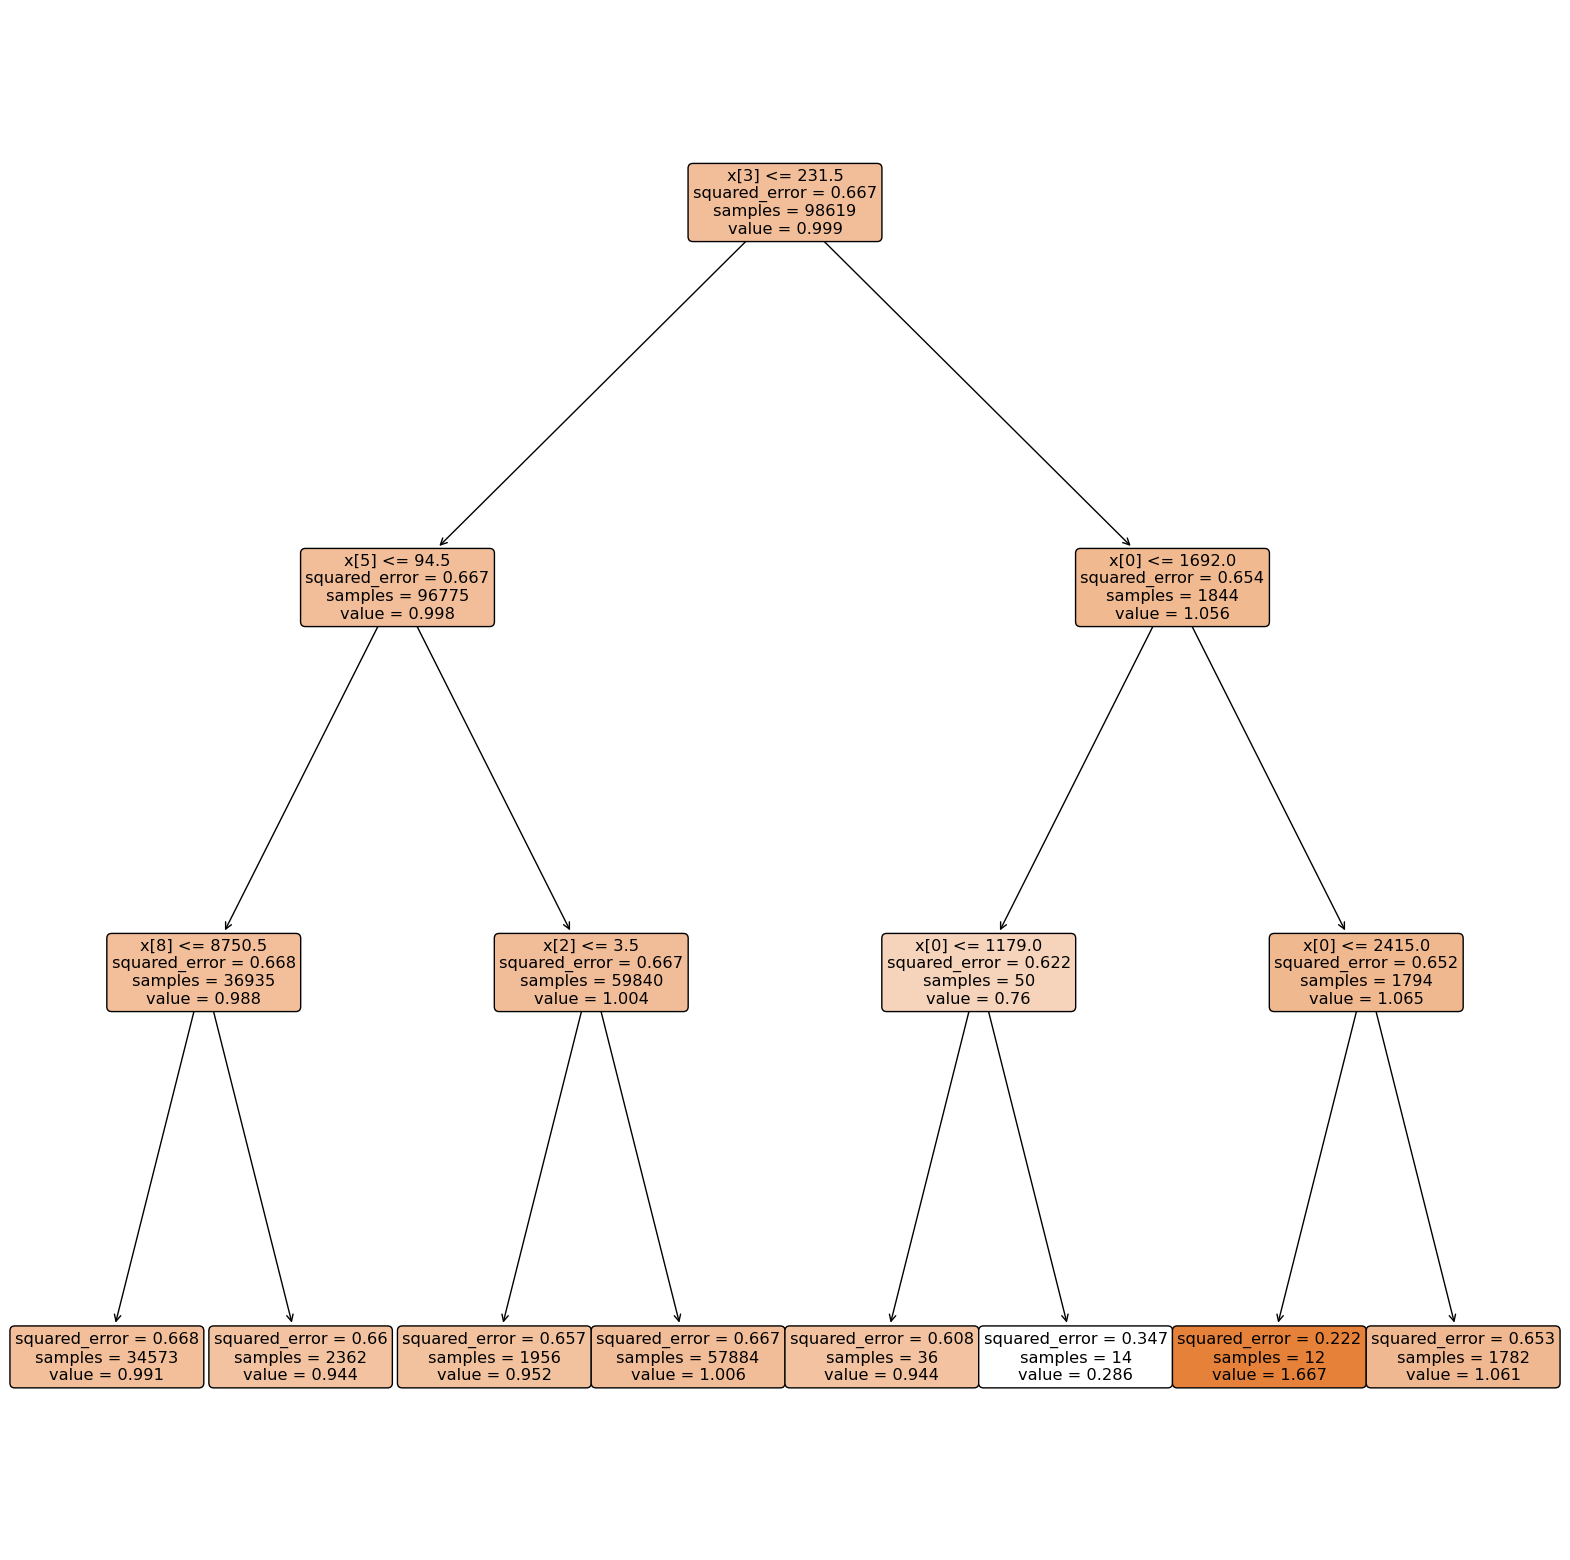

In [21]:
plt.figure(figsize=(20,20))
plot_tree(dtree,filled=True,rounded=True)
plt.show()